In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from PIL import Image
import json
import torch
import os
import glob
import maskrcnn_benchmark

In [5]:
aps = {}
results_dir = "maskrcnn-benchmark/results/orig/evaluation/xview_val_orig"
for dirname in glob.glob(os.path.join(results_dir, '0*')):
    it = int(os.path.basename(dirname))
    results = torch.load(os.path.join(dirname, "coco_results.pth"))
    aps[it] = results.results['bbox']

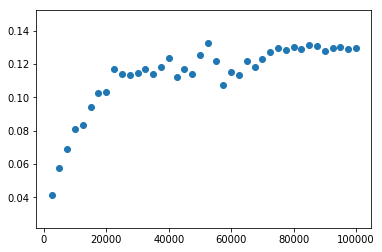

In [9]:
# plot mAP
plt.scatter(aps.keys(), [v['AP50'] for k,v in aps.items()])

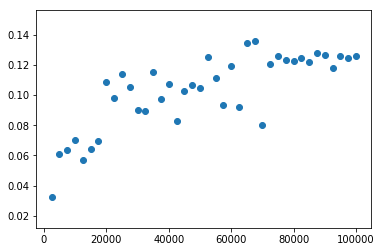

In [7]:
plt.scatter(aps.keys(), [v['APl'] for k,v in aps.items()])

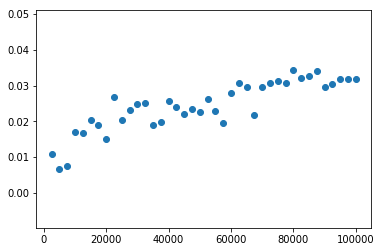

In [8]:
plt.scatter(aps.keys(), [v['APs'] for k,v in aps.items()])

60
7


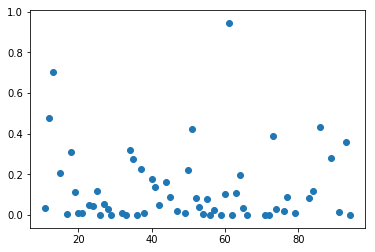

In [23]:
cats = [11, 12, 13, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 71, 72, 73, 74, 76, 77, 79,
83, 84, 86, 89, 91, 93, 94]

ap = [aps[100000][c]["AP50"] for c in cats]
plt.scatter(cats, ap)

print(len(cats))
print(sum([1 if a < 1e-8 else 0 for a in ap]))